In [7]:
# %matplotlib inline
# %config InlineBackend.figure_format = 'retina'

# import matplotlib.pyplot as plt

import torch
print(torch.__version__)
import torchvision
from torchvision import datasets, transforms
import torch.nn as nn

from IPython.display import clear_output

import helper

1.0.0


# Batch Gradient Descent

In [2]:
data_dir = '/Users/akshaykulkarni/flowers/train/'
batch_size = 1024
tf = transforms.Compose([transforms.Resize((255, 255)),
                         transforms.ToTensor(),
                        ])

train_dataset = datasets.ImageFolder(data_dir, transform = tf)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size = batch_size, shuffle = True, drop_last = True)

data_dir = '/Users/akshaykulkarni/flowers/test/'

test_dataset = datasets.ImageFolder(data_dir, transform = tf)

test_loader = torch.utils.data.DataLoader(test_dataset, batch_size = 32, shuffle = True, drop_last = True)

In [2]:
images, labels = next(iter(train_loader))
print(images.shape)
images = images.view(-1, images.shape[0]).float()
print(images.shape)
images /= 255
labels = labels.float()

NameError: name 'train_loader' is not defined

In [23]:
# Dimensions of different variables
# W and dw - (n, 1)
# b and db - (1)
# images - (n, batch_size)
# labels - (batch_size)
# out and pred - (1, batch_size)
# loss - (1)
m = len(train_loader) * batch_size
n = 255 * 255 * 3
learning_rate = 2
W = torch.randn(n, 1).float()
b = torch.randn(1).float()
num_epochs = 10

In [5]:
def binary_cross_entropy(A, Y):
    loss = (-1 / batch_size) * (torch.matmul(torch.log(A), Y) + torch.matmul(torch.log(1 - A), (1 - Y)))
    return loss

In [6]:
def sigmoid(x):
    return (1 / (1 + torch.exp(-x)))

In [16]:
def forward(x, y):
    out = sigmoid(torch.add(torch.matmul(W.t(), x), b))
    # size - (1, batch_size)
    loss = binary_cross_entropy(out, y)
    return loss, out

In [8]:
def backward(A, Y, X):
    Y2 = Y.view(1, Y.shape[0])
    dz = A - Y2
    dw = torch.matmul(X, dz.t()) / batch_size
    db = torch.sum(dz) / batch_size
    db = db.reshape([1])
    assert(W.shape == dw.shape)
    assert(b.shape == db.shape)
    return dw, db

In [24]:
# Batch Gradient Descent
loss_list = list()
for i in range(4000):
    # convert to GPU tensors
    if torch.cuda.is_available():
        images, labels = images.cuda(), labels.cuda()
        W, b = W.cuda(), b.cuda()

    loss, pred = forward(images, labels)
    epoch_loss = loss.item()
    loss_list.append(loss.item())
    dw, db = backward(pred, labels, images)
    # updating weights
    W = W - (learning_rate * dw)
    b = b - (learning_rate * db)
    
#     print(W)
#     print(b)
    if i % 20 == 0:
        print('Loss at epoch ', i, ' = ', epoch_loss)

Loss at epoch  0  =  1.070543885231018
Loss at epoch  20  =  0.6998060941696167
Loss at epoch  40  =  0.6980695724487305
Loss at epoch  60  =  0.6965532302856445
Loss at epoch  80  =  0.6952072381973267
Loss at epoch  100  =  0.6939963698387146
Loss at epoch  120  =  0.6928946375846863
Loss at epoch  140  =  0.6918826103210449
Loss at epoch  160  =  0.6909450888633728
Loss at epoch  180  =  0.6900707483291626
Loss at epoch  200  =  0.6892505884170532
Loss at epoch  220  =  0.6884773373603821
Loss at epoch  240  =  0.6877448558807373
Loss at epoch  260  =  0.6870485544204712
Loss at epoch  280  =  0.6863839626312256
Loss at epoch  300  =  0.6857475638389587
Loss at epoch  320  =  0.6851369142532349
Loss at epoch  340  =  0.6845489740371704
Loss at epoch  360  =  0.6839815378189087
Loss at epoch  380  =  0.6834332346916199
Loss at epoch  400  =  0.6829017400741577
Loss at epoch  420  =  0.6823862195014954
Loss at epoch  440  =  0.6818849444389343
Loss at epoch  460  =  0.6813971400260925

KeyboardInterrupt: 

In [25]:
if torch.cuda.is_available():
    images = images.cuda()
    labels = labels.cuda()
    W = W.cuda()
    b = b.cuda()
    
loss, pred = forward(images, labels)
pred = (pred >= 0.5)

pred = pred.view(pred.shape[1])
mismatch = (torch.eq(pred, labels.byte()))
acc = torch.sum(mismatch.float())
acc = acc * 100 / 1024
print('Training accuracy = ', acc)

# acc = 0
# for batch_idx, (images, labels) in enumerate(test_loader):
#     if torch.cuda.is_available():
#         images = images.cuda()
#         labels = labels.cuda()
#         W = W.cuda()
#         b = b.cuda()
#     labels = labels.float()
#     images = images.view(-1, images.shape[0]).float()
#     images /= 255

#     loss, pred = forward(images, labels)
#     pred = (pred >= 0.5)

#     pred = pred.view(pred.shape[1])
#     mismatch = torch.sum(torch.eq(pred, labels.byte()))
#     acc += mismatch.item()

# acc /= (len(test_loader) * 32)
# print('Validation accuracy = ', acc * 100)

Training accuracy =  tensor(62.0117)


# Mini-Batch Gradient Descent

In [11]:
data_dir = '/home/ivlabs/users/akshay/flowers/train/'
batch_size = 32
tf = transforms.Compose([transforms.Resize((255, 255)),
                         transforms.RandomHorizontalFlip(p = 0.5),
                         transforms.ToTensor(),
                        ])

train_dataset = datasets.ImageFolder(data_dir, transform = tf)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size = batch_size, shuffle = True, drop_last = True)

data_dir = '/home/ivlabs/users/akshay/flowers/test/'

test_dataset = datasets.ImageFolder(data_dir, transform = tf)

test_loader = torch.utils.data.DataLoader(test_dataset, batch_size = batch_size, shuffle = True, drop_last = True)

print('No. of training images - ', len(train_loader) * batch_size)
print('No. of testing images - ', len(test_loader) * batch_size)

No. of training images -  1376
No. of testing images -  96


In [12]:
# Dimensions of different variables
# W and dw - (n, 1)
# b and db - (1)
# images - (n, batch_size)
# labels - (batch_size)
# out and pred - (1, batch_size)
# loss - (1)
m = len(train_loader) * batch_size
n = 255 * 255 * 3
learning_rate = 1
# W = torch.randn(n, 1).float()
b = torch.randn(1).float()
# Xavier initialization of weights
W = torch.empty(n, 1)
nn.init.xavier_uniform_(W, gain=nn.init.calculate_gain('sigmoid'))
num_epochs = 500

In [13]:
def binary_cross_entropy(A, Y):
    loss = (-1 / batch_size) * (torch.matmul(torch.log(A), Y) + torch.matmul(torch.log(1 - A), (1 - Y)))
    return loss

def sigmoid(x):
    return (1 / (1 + torch.exp(-x)))

def forward(x, y):
    out = torch.add(torch.matmul(W.t(), x), b)
    out = sigmoid(out)
    # size - (1, batch_size)
    loss = binary_cross_entropy(out, y)
    return loss, out

def backward(A, Y, X):
    Y2 = Y.view(1, Y.shape[0])
    dz = A - Y2
    dw = torch.matmul(X, dz.t()) / batch_size
    db = torch.sum(dz) / batch_size
    db = db.reshape([1])
    assert(W.shape == dw.shape)
    assert(b.shape == db.shape)
    return dw, db

In [15]:
train_acc_list = list()
train_loss_list = list()
val_loss_list = list()
val_acc_list = list()
for i in range(num_epochs):
    train_loss = 0
    train_acc = 0
    DW = torch.zeros(n, 1).float()
    DB = torch.zeros(1).float()
    for batch_idx, (images, labels) in enumerate(train_loader):
        # convert to GPU tensors
        if torch.cuda.is_available():
            images, labels = images.cuda(), labels.cuda()
            W, b = W.cuda(), b.cuda()
            DW, DB = DW.cuda(), DB.cuda()

        # convert to float and resize images to (n, batch_size) size
        labels = labels.float()
        images = images.view(-1, images.shape[0]).float()
        images /= 255

        loss, pred = forward(images, labels)
        train_loss += loss.item()

        dw, db = backward(pred, labels, images)
        assert(DW.shape == dw.shape)
        assert(DB.shape == db.shape)
        DW += dw
        DB += db

        pred = (pred >= 0.5)
        pred = pred.view(pred.shape[1])
        mismatch = torch.sum(torch.eq(pred, labels.byte()))
        train_acc += mismatch.item()

    DB /= len(train_loader)
    DW /= len(train_loader)
    # updating weights
    W = W - (learning_rate * DW)
    b = b - (learning_rate * DB)

    if i % 25 == 0:
        weights_name = 'weights_' + str(i) + '.pt'
        bias_name = 'bias_' + str(i) + '.pt'
        torch.save(W, weights_name)
        torch.save(b, bias_name)
#     print(W)
#     print(b)

    train_loss /= len(train_loader)
    train_loss_list.append(train_loss)
    # print(f'Training Loss at {i} is equal to {epoch_loss}')

    train_acc /= (len(train_loader) * batch_size)
    train_acc_list.append(train_acc * 100)
    # print('Training accuracy at epoch ', i, ' = ', acc * 100)

    val_loss = 0
    val_acc = 0
    for batch_idx, (images, labels) in enumerate(test_loader):
        if torch.cuda.is_available():
            images = images.cuda()
            labels = labels.cuda()
            W = W.cuda()
            b = b.cuda()
        labels = labels.float()
        images = images.view(-1, images.shape[0]).float()
        images /= 255

        loss, pred = forward(images, labels)
        val_loss += loss.item()
        pred = (pred >= 0.5)

        pred = pred.view(pred.shape[1])
        mismatch = torch.sum(torch.eq(pred, labels.byte()))
        val_acc += mismatch.item()

    val_loss /= len(test_loader)
    val_loss_list.append(val_loss)
    # print('Validation Loss at epoch ', i, ' = ', val_loss)

    val_acc /= (len(test_loader) * batch_size)
    val_acc_list.append(val_acc * 100)
    # print('Validation accuracy at epoch ', i, ' = ', val_acc * 100)
    print(f'Epoch : [{i} / {num_epochs}] | TL : {train_loss} | TA : {train_acc * 100} | VL : {val_loss} | VA : {val_acc}')

Loss at epoch  0  =  0.9934323020279408
Validation accuracy =  66.66666666666666
Loss at epoch  1  =  0.9763908199965954
Validation accuracy =  37.5
Loss at epoch  2  =  0.964224262163043
Validation accuracy =  65.625


ValueError: x and y must have same first dimension, but have shapes (50,) and (5000,)

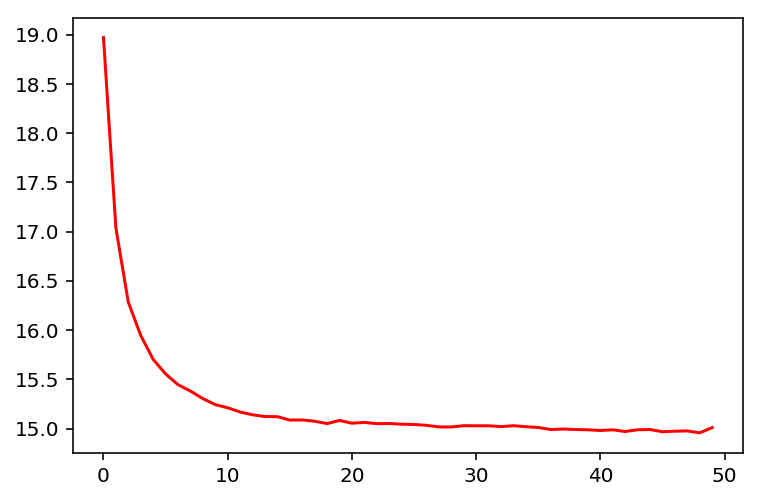

In [53]:
import csv

csvfile = "train_loss_list_500epochs.csv"
with open(csvfile, "w") as output:
    writer = csv.writer(output, lineterminator='\n')
    for value in train_loss_list:
        writer.writerow([value])

csvfile = "val_loss_list_500epochs.csv"
with open(csvfile, "w") as output:
    writer = csv.writer(output, lineterminator='\n')
    for value in val_loss_list:
        writer.writerow([value])

csvfile = "train_acc_list_500epochs.csv"
with open(csvfile, "w") as output:
    writer = csv.writer(output, lineterminator='\n')
    for value in train_acc_list:
        writer.writerow([value])

csvfile = "val_acc_list_500epochs.csv"
with open(csvfile, "w") as output:
    writer = csv.writer(output, lineterminator='\n')
    for value in val_acc_list:
        writer.writerow([value])